## Kaggle – DataTops®
Tu profe ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
from bootcampviztools import * 
from toolbox_ML import *

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 'laptop_ID')
df.index.name = None

## Exploración de los datos

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,912.0,14.981579,1.436719,10.1,14.0,15.6,15.6000,18.4
Price_in_euros,912.0,1111.724090,687.959172,174.0,589.0,978.0,1483.9425,6099.0


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

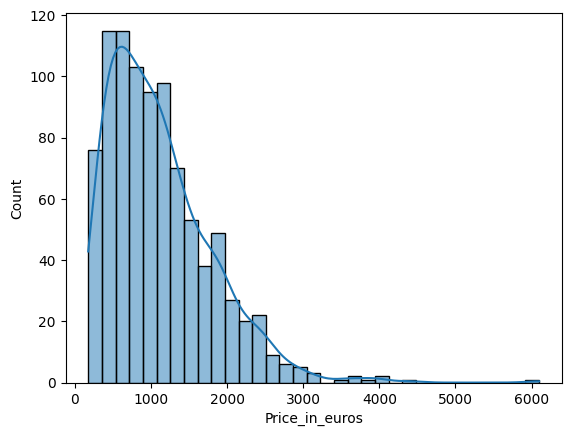

In [4]:
sns.histplot(df, x='Price_in_euros', kde=True);

In [5]:
describe_df(df)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,480,6,17,36,107,9,37,93,9,165,603
CARDIN(%),2.08,52.63,0.66,1.86,3.95,11.73,0.99,4.06,10.2,0.99,18.09,66.12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [7]:
tipifica_variables(df,10,30.0)

,variable,tipo_sugerido
0,Company,Numérica discreta
1,Product,Numérica discreta
2,TypeName,Categórica
3,Inches,Numérica discreta
4,ScreenResolution,Numérica discreta
5,Cpu,Numérica discreta
6,Ram,Categórica
7,Memory,Numérica discreta
8,Gpu,Numérica discreta
9,OpSys,Categórica


In [8]:
df.sample(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
1030,HP,ProBook 450,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.04kg,769.99
951,MSI,GP62M Leopard,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1199.00
247,Asus,F756UX-T4201D (i7-7500U/8GB/128GB,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69kg,889.00
1224,HP,15-bs025nv (i5-7200U/8GB/256GB/W10),Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,579.00
995,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1195.00
1313,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
890,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.04kg,839.00
244,Acer,Nitro AN515-51,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,846.00
1120,Dell,Latitude E5270,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.5kg,1413.10
761,Asus,X550VX-XX015D (i5-6300HQ/4GB/1TB/GeForce,Notebook,15.6,1366x768,Intel Core i5 6300HQ 2.3GHz,4GB,1TB HDD,Nvidia GeForce GTX 950M,No OS,2.45kg,579.00


In [9]:
df_copia = df.copy()

In [10]:
df_copia['ram_gb'] = df_copia['Ram'].str.replace('GB', '').astype(float)
df_copia['weight_kg'] = df_copia['Weight'].replace(r'kg','', regex=True).astype(float)

In [11]:
df_copia.Cpu.value_counts().nlargest(20)

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               97
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
Intel Core i3 6006U 2GHz                 45
Intel Core i5 6200U 2.3GHz               44
Intel Core i7 6500U 2.5GHz               40
Intel Core i7 6700HQ 2.6GHz              30
Intel Celeron Dual Core N3060 1.6GHz     25
Intel Core i3 7100U 2.4GHz               22
Intel Celeron Dual Core N3350 1.1GHz     22
Intel Core i5 7300HQ 2.5GHz              21
Intel Core i7 7600U 2.8GHz               11
Intel Core i3 6006U 2.0GHz               11
Intel Celeron Dual Core N3050 1.6GHz     10
Intel Pentium Quad Core N3710 1.6GHz     10
Intel Pentium Quad Core N4200 1.1GHz     10
Intel Core i7 6600U 2.6GHz                9
Intel Core i5 6300U 2.4GHz                8
Name: count, dtype: int64

In [12]:
# estos son los 20 valores más frecuentes, la marca intel core es la que mas se repite, asi que crearé 3 nuevas columnas por modelo

In [12]:
df_copia['core_i3'] = df_copia['Cpu'].str.contains(r'i3', regex=True).astype(int)
df_copia['core_i5'] = df_copia['Cpu'].str.contains(r'i5', regex=True).astype(int)
df_copia['core_i7'] = df_copia['Cpu'].str.contains(r'i7', regex=True).astype(int)

In [13]:
df_copia['cpu_ghz'] = df_copia['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

In [14]:
df_copia['cpu_ghz'].value_counts(dropna=False)

cpu_ghz
2.50    199
2.80    120
2.70    117
1.60    107
NaN      59
2.30     58
1.80     51
2.60     47
1.10     37
2.40     33
2.90     15
2.00     13
1.20     10
1.50      9
1.44      9
2.20      7
1.30      5
3.60      4
0.90      3
3.10      2
1.90      2
2.10      2
1.00      1
3.20      1
1.92      1
Name: count, dtype: int64

In [15]:
mediana_ghz=df_copia['cpu_ghz'].median()
df_copia['cpu_ghz'] = df_copia['cpu_ghz'].fillna(mediana_ghz)

In [16]:
df['ScreenResolution'].value_counts().nlargest(20)

ScreenResolution
Full HD 1920x1080                                349
1366x768                                         211
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         32
Full HD / Touchscreen 1920x1080                   30
1600x900                                          14
Quad HD+ / Touchscreen 3200x1800                  11
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     10
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel 4K Ultra HD 3840x2160                    5
IPS Panel Retina Display 2560x1600                 5
Touchscreen 2256x1504                              5
1440x900                                           4
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Retina Display 2304x1440                 4
IPS Panel 1366x768           

In [17]:
# viendo los valores más repetidos, voy a hacer nuevas columnas, con IPS, 4K, Touchscreen y resolucion total

In [18]:
df_copia['IPS'] =  df_copia['ScreenResolution'].str.contains(r'IPS', regex=True).astype(int)
df_copia['4K'] =  df_copia['ScreenResolution'].str.contains(r'4K', regex=True).astype(int)
df_copia['tactil'] =  df_copia['ScreenResolution'].str.contains(r'Touchscreen', regex=True).astype(int)

In [19]:
df_copia[['resolucion_1', 'resolucion_2']]= df_copia['ScreenResolution'].str.extract(r'(\d+)x(\d+)',  expand=True).astype(int)

In [20]:
df_copia['resolucion'] = df_copia['resolucion_1']*df_copia['resolucion_2']

In [21]:
df_copia['Memory'].value_counts()

Memory
256GB SSD                        282
1TB HDD                          152
500GB HDD                         92
512GB SSD                         83
128GB SSD +  1TB HDD              67
128GB SSD                         54
256GB SSD +  1TB HDD              52
32GB Flash Storage                33
1TB SSD                           12
64GB Flash Storage                11
2TB HDD                            8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               6
16GB Flash Storage                 6
1.0TB Hybrid                       5
32GB SSD                           5
128GB Flash Storage                4
180GB SSD                          3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             1
128GB SSD +  2TB HDD               1
512GB SSD +  512GB SSD             1
64GB Flash Storage +  1TB HDD      1
64GB SSD                       

In [22]:
# voy a tener en cuenta los teras (T) pasandolos a GB y sumandolo todo

In [23]:
df_copia[['memoria_1', 'memoria_2']]= df_copia['Memory'].str.split('+', n=1, expand=True)
df_copia['memoria_1'] = df_copia['memoria_1'].str.strip()
df_copia['memoria_2'] = df_copia['memoria_2'].str.strip()

In [24]:
df_copia[['memoria_1', 'memoria_2']] = df_copia[['memoria_1', 'memoria_2']].replace(
    {'GB': '', 'TB': '', 'SSD':'', 'Flash Storage': '', 'Hybrid': '', 'HDD':''}, regex=True).astype(float)

In [25]:
df_copia['memoria_1'] = df_copia['memoria_1'].apply(lambda x: x*1024 if x in [1.0, 2.0] else x)
df_copia['memoria_2'] = df_copia['memoria_2'].apply(lambda x: x*1024 if x in [1.0, 2.0] else x)

In [26]:
df_copia['memoria_2'].value_counts(dropna=False)

memoria_2
NaN       768
1024.0    131
2048.0      9
256.0       2
512.0       1
500.0       1
Name: count, dtype: int64

In [27]:
df_copia['memoria_gb'] = df_copia['memoria_1'] + df_copia['memoria_2'].fillna(0)

In [28]:
df_copia['Gpu'].value_counts().nlargest(20)

Gpu
Intel HD Graphics 620         185
Intel HD Graphics 520         125
Intel UHD Graphics 620         52
Nvidia GeForce GTX 1050        48
Nvidia GeForce 940MX           31
Nvidia GeForce GTX 1060        31
Intel HD Graphics 400          30
Intel HD Graphics 500          27
Intel HD Graphics              25
AMD Radeon 530                 22
Nvidia GeForce GTX 1070        22
Nvidia GeForce GTX 1050 Ti     21
AMD Radeon R5 M430             18
Nvidia GeForce 930MX           17
Nvidia GeForce GTX 960M        12
Intel HD Graphics 515          12
AMD Radeon 520                 11
Nvidia GeForce 920MX           10
Nvidia GeForce MX150           10
Intel HD Graphics 615          10
Name: count, dtype: int64

In [29]:
# la Gpu, lo que se ve son diferentes marcas, creo que las voy a dividir en esas tres marcas como nuevas columnas

In [30]:
df_copia['Nvidia'] = df_copia['Gpu'].str.contains(r'Nvidia', regex=True).astype(int)
df_copia['AMD'] = df_copia['Gpu'].str.contains(r'AMD', regex=True).astype(int)
df_copia['Intel'] = df_copia['Gpu'].str.contains(r'Intel', regex=True).astype(int)

In [31]:
df_copia['TypeName'].value_counts()

TypeName
Notebook              509
Gaming                143
Ultrabook             141
2 in 1 Convertible     80
Workstation            20
Netbook                19
Name: count, dtype: int64

In [32]:
#hacemos un get_dummies para esa columna, asi no le damos mas importancia a un ultrabook por ejemplo que a otro tipo

In [33]:
typename  = pd.get_dummies(df_copia['TypeName']).astype(int)

In [34]:
df_copia = pd.concat([df_copia, typename], axis = 1)

In [150]:
pd.set_option('display.max_columns', None)

In [151]:
df_transformado = df_copia[['ram_gb', 'weight_kg', 'core_i3', 'core_i5', 'core_i7', 'IPS', '4K', 'tactil', 'resolucion', 'memoria_gb', 'cpu_ghz', 'Nvidia', 'AMD', 'Intel', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation', 'Price_in_euros']]
df_transformado

,ram_gb,weight_kg,core_i3,core_i5,core_i7,IPS,4K,tactil,resolucion,memoria_gb,cpu_ghz,Nvidia,AMD,Intel,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Price_in_euros
755,8.0,1.86,1,0,0,0,0,0,2073600,256.0,2.5,0,0,1,0,0,0,1,0,0,539.00
618,16.0,2.59,0,0,1,0,0,0,2073600,1024.0,2.6,1,0,0,0,1,0,0,0,0,879.01
909,8.0,2.04,0,0,1,0,0,0,2073600,1024.0,2.7,1,0,0,0,0,0,1,0,0,900.00
2,8.0,1.34,0,1,0,0,0,0,1296000,128.0,1.8,0,0,1,0,0,0,0,1,0,898.94
286,4.0,2.25,1,0,0,0,0,0,2073600,1024.0,2.0,0,1,0,0,0,0,1,0,0,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,8.0,2.20,0,1,0,0,0,0,2073600,256.0,1.6,0,1,0,0,0,0,1,0,0,800.00
1160,8.0,1.48,0,1,0,0,0,1,2073600,256.0,2.4,0,0,1,1,0,0,0,0,0,1629.00
78,8.0,2.20,0,1,0,0,0,0,2073600,2048.0,2.5,0,0,1,0,0,0,1,0,0,519.00
23,4.0,1.86,0,0,0,0,0,0,1049088,500.0,1.5,0,1,0,0,0,0,1,0,0,258.00


In [36]:
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ram_gb              912 non-null    float64
 1   weight_kg           912 non-null    float64
 2   core_i3             912 non-null    int64  
 3   core_i5             912 non-null    int64  
 4   core_i7             912 non-null    int64  
 5   IPS                 912 non-null    int64  
 6   4K                  912 non-null    int64  
 7   tactil              912 non-null    int64  
 8   resolucion          912 non-null    int64  
 9   memoria_gb          912 non-null    float64
 10  cpu_ghz             912 non-null    float64
 11  Nvidia              912 non-null    int64  
 12  AMD                 912 non-null    int64  
 13  Intel               912 non-null    int64  
 14  2 in 1 Convertible  912 non-null    int64  
 15  Gaming              912 non-null    int64  
 16  Netbook    

In [37]:
describe_df(df_transformado).T

,DATA_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
ram_gb,float64,0.0,9,0.99
weight_kg,float64,0.0,158,17.32
core_i3,int64,0.0,2,0.22
core_i5,int64,0.0,2,0.22
core_i7,int64,0.0,2,0.22
IPS,int64,0.0,2,0.22
4K,int64,0.0,2,0.22
tactil,int64,0.0,2,0.22
resolucion,int64,0.0,14,1.54
memoria_gb,float64,0.0,22,2.41


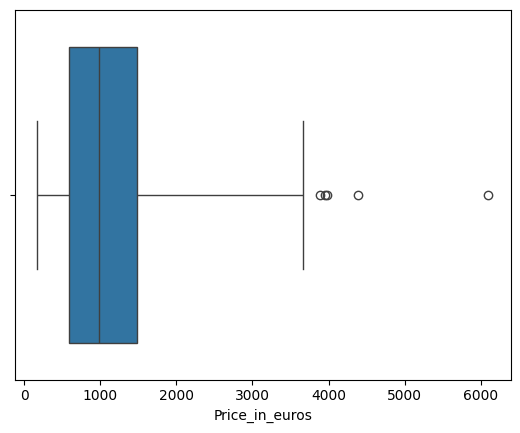

In [38]:
sns.boxplot(df_transformado, x='Price_in_euros', whis = 2.5);

In [48]:
#parece tener unos outliers a partir de 4000

In [58]:
# vamos a hacer el split

In [39]:
from sklearn.model_selection import train_test_split

X = df_transformado.drop(columns = 'Price_in_euros')
y = df_transformado['Price_in_euros']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(729, 20)
(183, 20)
(729,)
(183,)


In [41]:
df_cor = X_train.copy()
df_cor['target'] = y_train
df_cor.corr()['target'].sort_values(ascending=False)

target                1.000000
ram_gb                0.744269
core_i7               0.556601
resolucion            0.497141
Gaming                0.399879
cpu_ghz               0.385217
Nvidia                0.324923
4K                    0.299947
IPS                   0.269970
Ultrabook             0.269501
tactil                0.229258
Workstation           0.217625
weight_kg             0.202341
memoria_gb            0.181476
2 in 1 Convertible    0.124989
core_i5              -0.088133
Netbook              -0.137376
Intel                -0.179333
AMD                  -0.181943
core_i3              -0.278553
Notebook             -0.576508
Name: target, dtype: float64

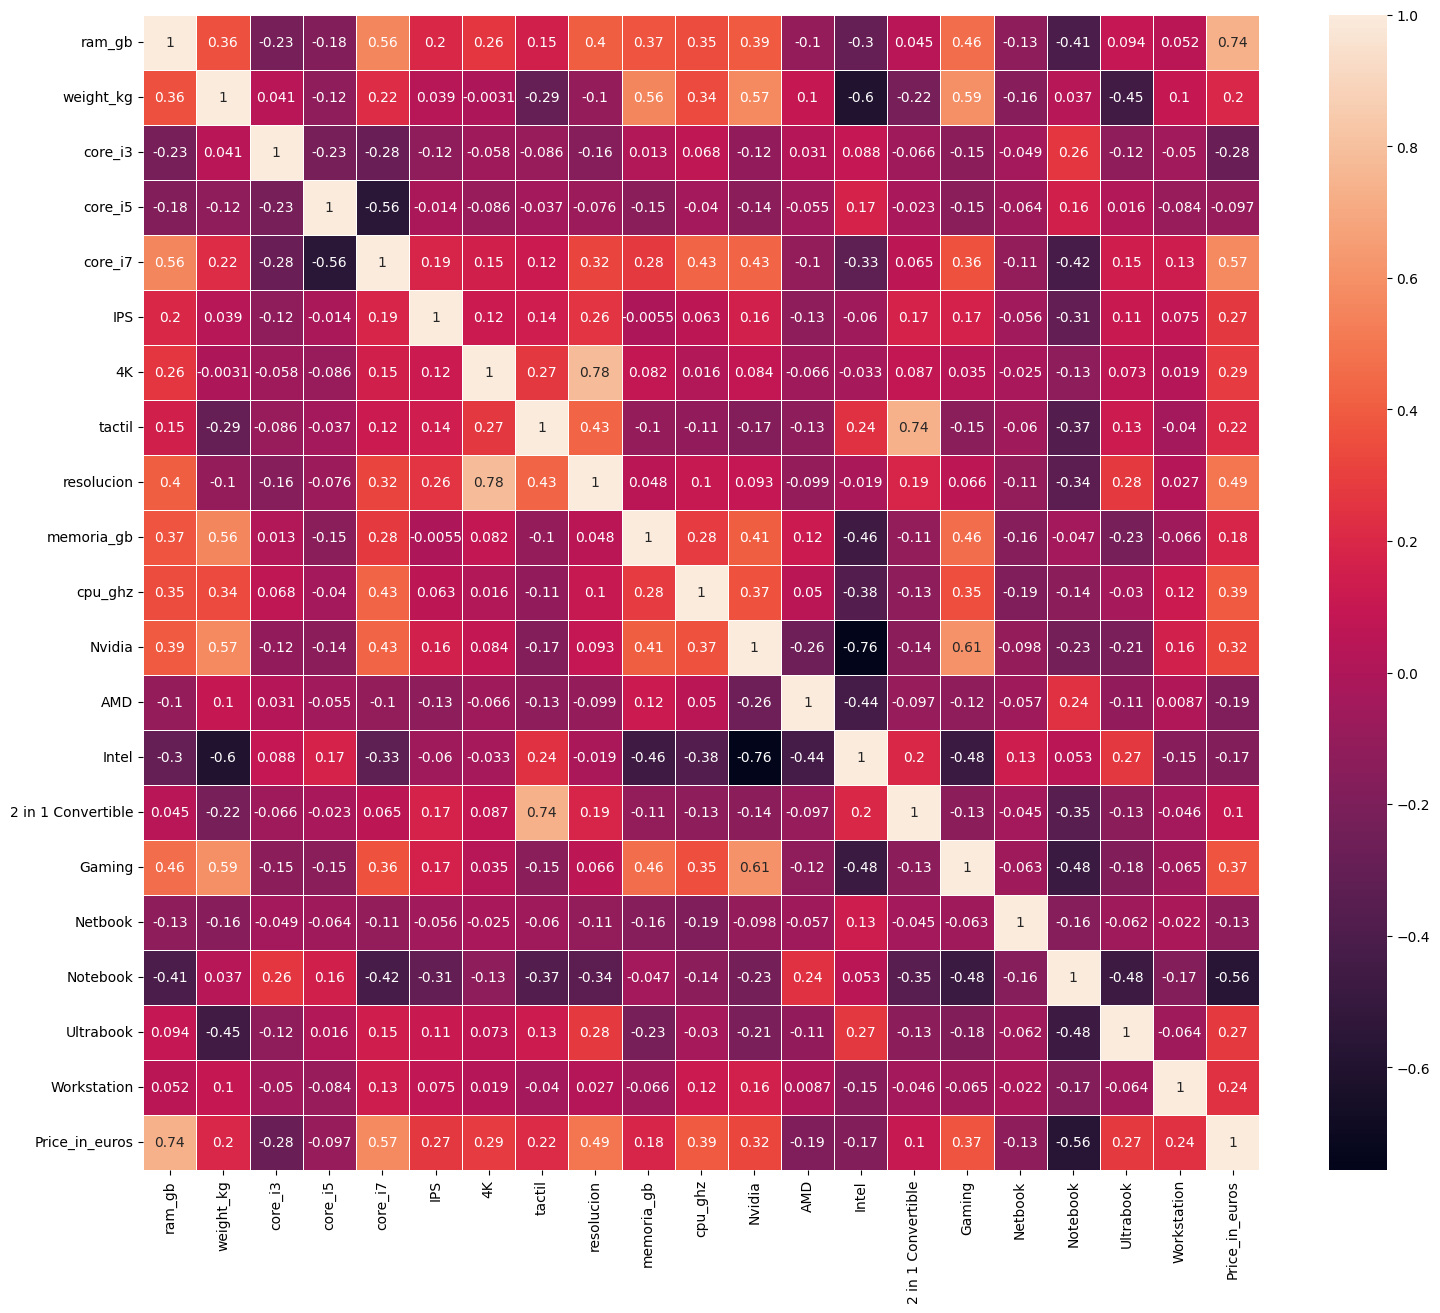

In [42]:
plt.figure(figsize=(18,15))
sns.heatmap(df_transformado.corr(), annot=True, linewidths=0.5);

In [43]:
features = ['ram_gb', 'core_i3', 'core_i5', 'core_i7', 'resolucion', 'cpu_ghz', 'Nvidia', 'AMD', 'Intel', 'Gaming', 'Netbook', 'Notebook']

***

## Modelado

In [54]:
# voy a usar unos metodos para seleccionar features

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

rforest = RandomForestRegressor(random_state= 42)

In [45]:
# SelectFromModel
selector_model = SelectFromModel(estimator = rforest, threshold= "median")
selector_model.fit(X_train,y_train)
SFM = selector_model.get_feature_names_out().tolist()
SFM

['ram_gb',
 'weight_kg',
 'core_i5',
 'core_i7',
 'tactil',
 'resolucion',
 'memoria_gb',
 'cpu_ghz',
 'Notebook',
 'Workstation']

In [46]:
# RFE
from sklearn.feature_selection import RFE
rfe = RFE(estimator = rforest, step = 1) 

rfe.fit(X_train, y_train)
print(rfe.ranking_)
rfe.transform(X_train)
RFE = rfe.get_feature_names_out().tolist()
RFE

[ 1  1  8  1  1  2  4  1  1  1  1  3 10  7  9  6 11  1  5  1]


['ram_gb',
 'weight_kg',
 'core_i5',
 'core_i7',
 'tactil',
 'resolucion',
 'memoria_gb',
 'cpu_ghz',
 'Notebook',
 'Workstation']

In [47]:
# SFS
from sklearn.feature_selection import SequentialFeatureSelector
sfs_forward = SequentialFeatureSelector(rforest, cv = 5,scoring = "neg_root_mean_squared_error")
sfs_forward.fit(X_train, y_train)
SFS = sfs_forward.get_feature_names_out().tolist()
SFS

['ram_gb',
 'weight_kg',
 'core_i3',
 'core_i7',
 'resolucion',
 'memoria_gb',
 'cpu_ghz',
 'Intel',
 'Notebook',
 'Workstation']

In [48]:
# hard-voting
from collections import Counter
features_hard_voting = features + SFM + RFE + SFS
votos = Counter(features_hard_voting)
seleccion = [x for x,y in votos.most_common(10)]
seleccion

['ram_gb',
 'core_i7',
 'resolucion',
 'cpu_ghz',
 'Notebook',
 'core_i5',
 'weight_kg',
 'memoria_gb',
 'Workstation',
 'core_i3']

In [50]:
todas_features = X_train.columns.tolist()

In [52]:
listas = {
    'todas': todas_features,
    'manual':features,
    'SFM':SFM,
    'RFE':RFE,
    'SFS':SFS,
    'Hard_voting':seleccion}

-----------------------------------------------------------------------------------------------------------------

### 3. Baseline de modelos


In [58]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [54]:
xgb = XGBRegressor(verbosity=0, random_state= 42)
gbm = LGBMRegressor(verbose=-1, random_state= 42)
gradient_boost = GradientBoostingRegressor(verbose=0, random_state= 42)
cat_boost= CatBoostRegressor(verbose=0, random_state= 42)

In [55]:
modelos = {
    'rforest':rforest,
    'gbm':gbm,
    'gradient boost': gradient_boost,
    'cat':cat_boost
}

resultado = []
for nombre, modelo in modelos.items():
    for x,y in listas.items():
        x_Train = X_train[y]
        cros = cross_validate(modelo, x_Train, y_train, cv=10, scoring = ['neg_mean_squared_error'])
        resultado.append({
            'modelo': nombre,
            'metodo seleccion features': x,
            'rmse': np.sqrt(-np.mean(cros['test_neg_mean_squared_error']))
        })

In [56]:
eleccion = pd.DataFrame(resultado).sort_values(by='rmse')#, ascending=False)
eleccion.head(6)

,modelo,metodo seleccion features,rmse
22,cat,SFS,295.633943
23,cat,Hard_voting,296.319278
18,cat,todas,296.716187
21,cat,RFE,299.451012
20,cat,SFM,299.451012
4,rforest,SFS,303.438551


In [ ]:
# los mejores parametros para cat_boost

In [124]:
param_cat = {
        "iterations": [500,600, 700, 800, 900, 1000],
        "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.4],
        "depth": [2,3,5],
        "subsample": [0.05, 0.1, 0.3],
        "colsample_bylevel": [0.2,0.3,0.5, 1],
        'loss_function':['RMSE']
}

grid_cat = GridSearchCV(
    cat_boost,
    param_grid=  param_cat,
    cv=10,
    n_jobs = -1,
    scoring = 'neg_mean_squared_error'
)

grid_cat.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000149064F84F0>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.2, 0.3, 0.5, 1],
                         'depth': [2, 3, 5],
                         'iterations': [500, 600, 700, 800, 900, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.4],
                         'loss_function': ['RMSE'],
                         'subsample': [0.05, 0.1, 0.3]},
             scoring='neg_mean_squared_error')

In [125]:
best_params = grid_cat.best_params_
best_params

{'colsample_bylevel': 0.5,
 'depth': 3,
 'iterations': 800,
 'learning_rate': 0.3,
 'loss_function': 'RMSE',
 'subsample': 0.1}

In [128]:
model = CatBoostRegressor(**best_params, random_state=42, verbose=False)
model.fit(X_train, y_train)
ultimo_pred = model.predict(X_test)

In [136]:
rmse_optimized = np.sqrt(mean_squared_error(y_test, ultimo_pred))
print(f"RMSE: {rmse_optimized:.2f}")

RMSE: 345.68


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [137]:
print(f"RMSE: {rmse_optimized:.2f}")

RMSE: 345.68


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [79]:
X_pred = pd.read_csv("data/test.csv", index_col = 'laptop_ID')
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [80]:
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(float)
X_pred['weight_kg'] = X_pred['Weight'].replace(r'kg','', regex=True).astype(float)
X_pred['core_i3'] = X_pred['Cpu'].str.contains(r'i3', regex=True).astype(int)
X_pred['core_i5'] = X_pred['Cpu'].str.contains(r'i5', regex=True).astype(int)
X_pred['core_i7'] = X_pred['Cpu'].str.contains(r'i7', regex=True).astype(int)
X_pred['cpu_ghz'] = X_pred['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)
mediana_ghz2=X_pred['cpu_ghz'].median()
X_pred['cpu_ghz'] = X_pred['cpu_ghz'].fillna(mediana_ghz2)
X_pred['IPS'] =  X_pred['ScreenResolution'].str.contains(r'IPS', regex=True).astype(int)
X_pred['4K'] =  X_pred['ScreenResolution'].str.contains(r'4K', regex=True).astype(int)
X_pred['tactil'] =  X_pred['ScreenResolution'].str.contains(r'Touchscreen', regex=True).astype(int)
X_pred[['resolucion_1', 'resolucion_2']]= X_pred['ScreenResolution'].str.extract(r'(\d+)x(\d+)',  expand=True).astype(int)
X_pred['resolucion'] = X_pred['resolucion_1']*X_pred['resolucion_2']
X_pred[['memoria_1', 'memoria_2']]= X_pred['Memory'].str.split('+', n=1, expand=True)
X_pred['memoria_1'] = X_pred['memoria_1'].str.strip()
X_pred['memoria_2'] = X_pred['memoria_2'].str.strip()
X_pred[['memoria_1', 'memoria_2']] = X_pred[['memoria_1', 'memoria_2']].replace(
    {'GB': '', 'TB': '', 'SSD':'', 'Flash Storage': '', 'Hybrid': '', 'HDD':''}, regex=True).astype(float)
X_pred['memoria_1'] = X_pred['memoria_1'].apply(lambda x: x*1024 if x in [1.0, 2.0] else x)
X_pred['memoria_2'] = X_pred['memoria_2'].apply(lambda x: x*1024 if x in [1.0, 2.0] else x)
X_pred['memoria_gb'] = X_pred['memoria_1'] + X_pred['memoria_2'].fillna(0)
X_pred['Nvidia'] = X_pred['Gpu'].str.contains(r'Nvidia', regex=True).astype(int)
X_pred['AMD'] = X_pred['Gpu'].str.contains(r'AMD', regex=True).astype(int)
X_pred['Intel'] = X_pred['Gpu'].str.contains(r'Intel', regex=True).astype(int)
typename2  = pd.get_dummies(X_pred['TypeName']).astype(int)

In [138]:
X_pred1 = pd.concat([X_pred, typename2], axis = 1)
df_transformado = X_pred1[['ram_gb', 'weight_kg', 'core_i3', 'core_i5', 'core_i7', 'IPS', '4K', 'tactil', 'resolucion', 'memoria_gb', 'cpu_ghz', 'Nvidia', 'AMD', 'Intel', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']]
df_transformado

,ram_gb,weight_kg,core_i3,core_i5,core_i7,IPS,4K,tactil,resolucion,memoria_gb,cpu_ghz,Nvidia,AMD,Intel,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
209,16.0,2.400,0,0,1,0,0,0,2073600,512.0,2.8,1,0,0,0,1,0,0,0,0
1281,4.0,2.400,0,0,0,0,0,0,1049088,500.0,1.6,0,0,1,0,0,0,1,0,0
1168,4.0,1.900,1,0,0,0,0,0,1049088,1024.0,2.0,0,0,1,0,0,0,1,0,0
1231,8.0,2.191,0,1,0,1,0,1,2073600,256.0,2.5,0,0,1,1,0,0,0,0,0
1020,4.0,1.950,0,1,0,0,0,0,2073600,256.0,2.5,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,16.0,2.900,0,0,1,0,0,0,2073600,1536.0,2.8,1,0,0,0,1,0,0,0,0
948,4.0,1.470,0,1,0,1,0,0,2073600,128.0,2.3,0,0,1,0,0,0,1,0,0
483,8.0,1.780,0,0,1,0,0,0,2073600,256.0,2.8,1,0,0,0,0,0,0,0,1
1017,4.0,1.640,0,1,0,0,0,0,1049088,500.0,2.5,0,0,1,0,0,0,1,0,0


 ## 2. Replicar el procesado para ``test.csv``

In [140]:
df_transformado.head()

,ram_gb,weight_kg,core_i3,core_i5,core_i7,IPS,4K,tactil,resolucion,memoria_gb,cpu_ghz,Nvidia,AMD,Intel,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
209,16.0,2.400,0,0,1,0,0,0,2073600,512.0,2.8,1,0,0,0,1,0,0,0,0
1281,4.0,2.400,0,0,0,0,0,0,1049088,500.0,1.6,0,0,1,0,0,0,1,0,0
1168,4.0,1.900,1,0,0,0,0,0,1049088,1024.0,2.0,0,0,1,0,0,0,1,0,0
1231,8.0,2.191,0,1,0,1,0,1,2073600,256.0,2.5,0,0,1,1,0,0,0,0,0
1020,4.0,1.950,0,1,0,0,0,0,2073600,256.0,2.5,0,0,1,0,0,0,1,0,0


In [141]:
predictions_submit = grid_cat.predict(df_transformado)
predictions_submit

array([1565.30243089,  341.71741961,  374.70377485,  962.13943425,
        825.86664377,  546.31947402,  784.390305  , 1035.48128438,
       1177.15022825,  377.30150408, 2703.16922251, 1222.86365411,
        540.80457583, 1853.6126454 , 1006.45004236,  930.32898932,
       1907.69441667, 1409.66671625, 1777.14097199,  645.2645849 ,
       1512.34784047,  339.95483257,  574.91130671, 1340.70023692,
        302.7026207 ,  785.45654928,  468.56650482,  756.64302646,
       2268.05950227, 1067.71619151, 2286.97460054,  398.2611997 ,
        846.41871402, 3293.00454413, 2192.46565494, 1991.65853457,
        583.51454179, 1532.58056563,  964.14317827, 1784.98825324,
        829.55496391,  834.5919563 ,  542.72362506, 1216.76737476,
       1756.02729663, 1163.73035544, 1040.5289468 ,  554.20111583,
        808.561175  ,  491.14438968, 2114.30687876,  828.95780173,
       1098.73399157,  726.24247578, 2168.09396406, 1674.46094743,
        741.89716529,  867.48642307, 1077.83342885,  679.60777

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

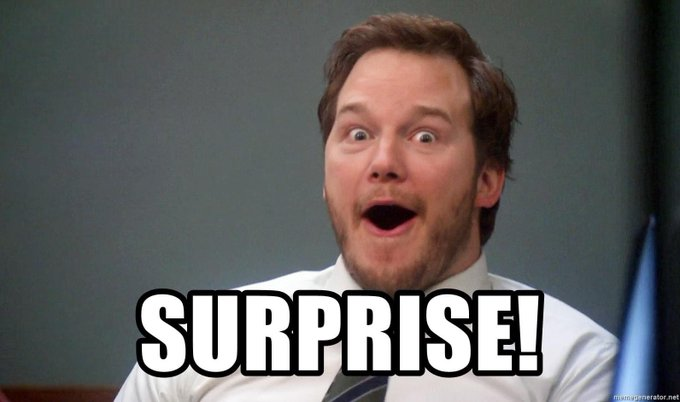

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [143]:
sample = pd.read_csv("data/sample_submission.csv")

In [144]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [145]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [146]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({
    'laptop_ID' : X_pred.index,
    'Price_in_euros' : predictions_submit
})

In [147]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1565.302431
1,1281,341.717420
2,1168,374.703775
3,1231,962.139434
4,1020,825.866644


In [148]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [121]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submissionCATTT.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [122]:
chequeador(submission)

You're ready to submit!
